In [0]:
# Importing the necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# Importing the data set

from sklearn import datasets

iris_data = datasets.load_iris()

In [3]:
print(type(iris_data))

<class 'sklearn.utils.Bunch'>


In [4]:
iris_data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
iris_data

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [0]:
# Create a dataframe of the 'iris_data'

iris = pd.DataFrame(data = iris_data['data'], columns = iris_data['feature_names'])

In [7]:
# Displays first 5 columns of 'iris'

iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
# Displays properties of each column

iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [0]:
# VISUALIZING THE DATA

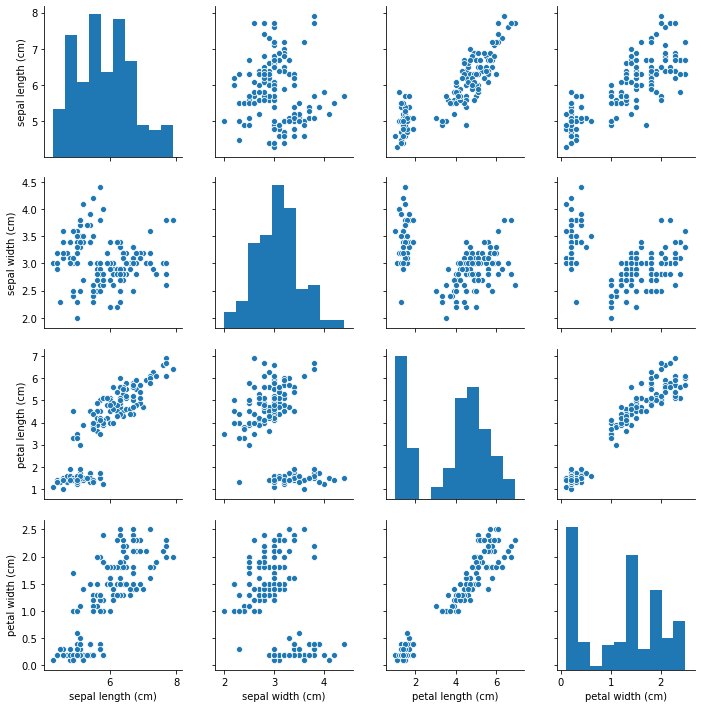

In [10]:
sns.pairplot(iris)

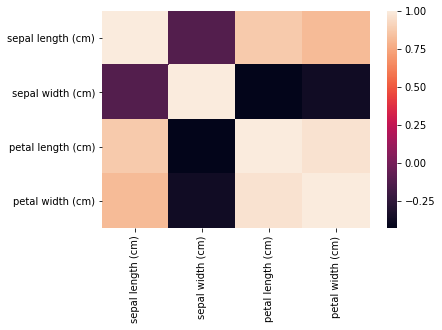

In [11]:
sns.heatmap(iris.corr())

In [12]:
# 'pairs' is a list of combinations of iris columns

pairs = []

for i in range(len(iris.columns)):
  for j in range(i+1,len(iris.columns)):
    pairs.append((iris.columns[i],iris.columns[j]))

pairs


[('sepal length (cm)', 'sepal width (cm)'),
 ('sepal length (cm)', 'petal length (cm)'),
 ('sepal length (cm)', 'petal width (cm)'),
 ('sepal width (cm)', 'petal length (cm)'),
 ('sepal width (cm)', 'petal width (cm)'),
 ('petal length (cm)', 'petal width (cm)')]

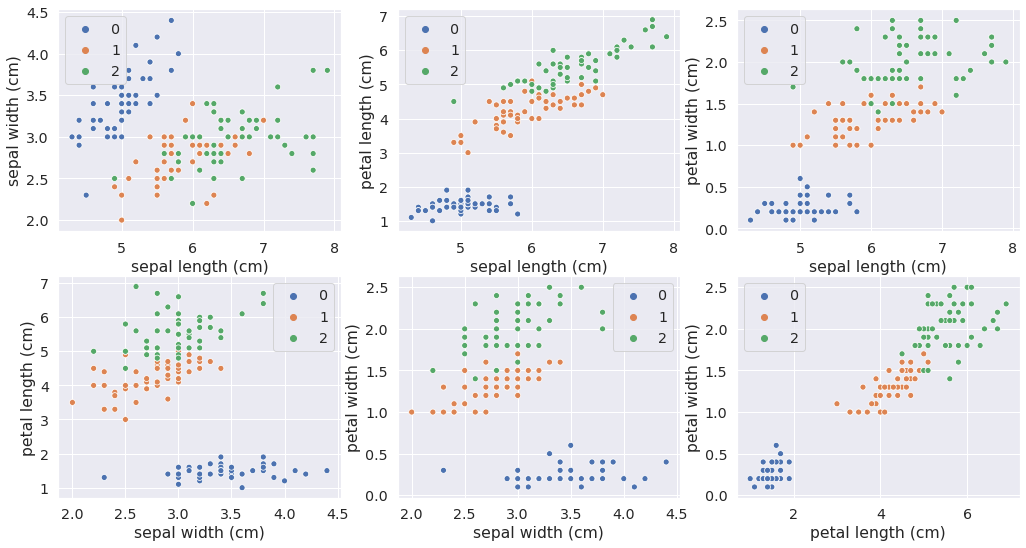

In [13]:
a = 1
left = 0.01

plt.figure(figsize = (15,9)) # Adjusting figure size

for i,j in pairs:

  sns.set(font_scale=1.3) # Adjusting font size
  plt.subplots_adjust(left) # Adjusting spacing between subplots
  
  plt.subplot(2,3,a) # Subplot No.

  sns.scatterplot(iris[i],iris[j],hue = iris_data['target'],palette=["C0", "C1", "C2"]) # Plotting the scatter plot
  
  a = a+1

In [0]:
# ELBOW METHOD

Text(0, 0.5, 'Inertia score')

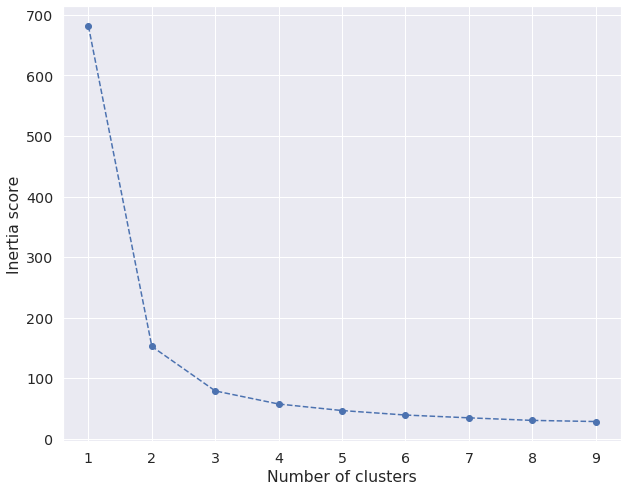

In [14]:
from sklearn.cluster import KMeans

# K-Means model is run for different values of 'number of clusters'

clusters = list(range(1,10))

# 'inertia' stores the inertia score of K-Means model

inertia = []

# 'for' loop to run K-Means model for each value of 'number of clusters'

for i in clusters:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(iris)
  inertia.append(kmeans.inertia_)

# A graph is plotted with 'number of clusters' on x-axis and 'inertia score' on y-axis

plt.figure(figsize = (10,8))
plt.plot(clusters,inertia,marker = 'o',linestyle = 'dashed')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia score')

In [0]:
# PRINCIPAL COMPONENT ANALYSIS

In [0]:
# Importing PCA

from sklearn.decomposition import PCA

# Perform PCA

pca = PCA(n_components = 2)
pc = pca.fit_transform(iris)

In [17]:
pc.shape

(150, 2)

In [18]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(pc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

<Figure size 432x288 with 0 Axes>

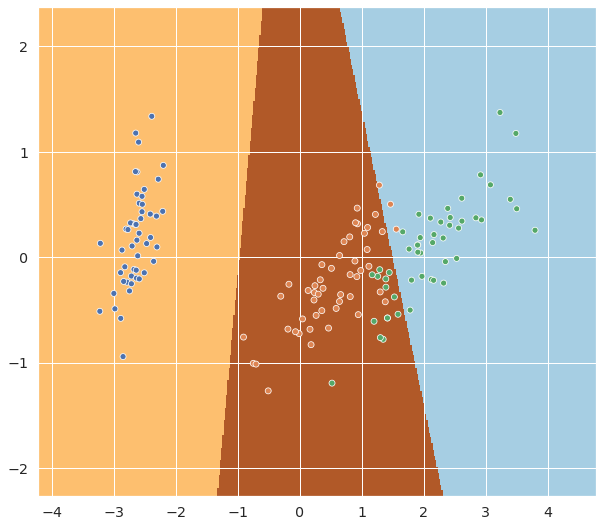

In [19]:
# Define step size of mesh

h = 0.02

# Generate mesh grid

x_min, x_max = pc[:,0].min() - 1, pc[:,0].max() + 1
y_min, y_max = pc[:,1].min() - 1, pc[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min,y_max,h))

# Obtain labels for each point in the mesh using our trained model on reduced data set

Z = kmeans.predict(np.c_[xx.ravel(),yy.ravel()])

# Put the result into a color plot

Z = Z.reshape(xx.shape)

# Define color plot

cmap = plt.cm.Paired

# Plotting color plot figure (Decision Boundary)

plt.clf()
plt.figure(figsize=(10,9))
plt.imshow(Z,interpolation = 'nearest',extent=(xx.min(),xx.max(),yy.min(),yy.max()),
           cmap = cmap,aspect = 'auto',origin = 'lower')

# Plotting the points

sns.scatterplot(pc[:,0],pc[:,1],hue = iris_data['target'],palette=["C0", "C1", "C2"],legend = False)

In [0]:
# Comparison of 'with PCA' and 'without PCA'

In [21]:
from sklearn import metrics

# Training model on actual data

kmeans1 = KMeans(n_clusters=3)
kmeans1.fit(iris)

# Training model on reduced data

kmeans2 = KMeans(n_clusters=3)
kmeans2.fit(pc)

# Importing Metrics

from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score
from sklearn.metrics import v_measure_score

# Calculating Accuracy

models = [kmeans1,kmeans2]
accuracy = []

for i in models:
  h = 0
  correct_label = 0
  for j in range(i.n_clusters):
    index = np.where(iris_data['target'] == h)
    correct_label = correct_label + (i.labels_[index] == i.labels_[index].max()).sum()
    h = h + 1
  accuracy.append(correct_label/len(i.labels_))

# Printing the metrics

k = 0
for i in models:
  print('Accuracy : {}'.format(accuracy[k]))
  print('Homogeneity score : {}'.format(metrics.homogeneity_score(iris_data['target'],i.labels_)))
  print('Completeness score : {}'.format(metrics.completeness_score(iris_data['target'],i.labels_)))
  print('V-Measure : {}'.format(metrics.v_measure_score(iris_data['target'],i.labels_)))
  print('\n')
  k = k+1

Accuracy : 0.7466666666666667
Homogeneity score : 0.7514854021988338
Completeness score : 0.7649861514489815
V-Measure : 0.7581756800057784


Accuracy : 0.74
Homogeneity score : 0.736419288125285
Completeness score : 0.7474865805095325
V-Measure : 0.7419116631817838


